In [1]:
#Importing libraries
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import normalize

In [2]:
from sklearn.datasets import load_boston   #importing the data from dataset


In [3]:
boston_data = load_boston()

In [4]:
boston_data['data'].shape

(506, 13)

In [5]:
type(boston_data)

sklearn.utils.Bunch

In [6]:
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [7]:
df['Price']=pd.DataFrame(boston_data.target)

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
corr = df.corr()

In [10]:
corr['Price'].sort_values(ascending=False)  #correlation between the variables with respect to Price


Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

In [11]:
print(boston_data.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
#RM and LSTAT have positive and negative correlation with Price

x = df[['RM','LSTAT']]
y = df['Price']
y = y.values.reshape((y.shape[0], 1))

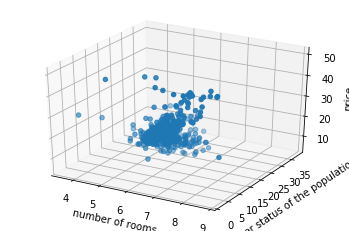

In [13]:
#lets see the feature relation in the same plot
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = x.iloc[:, 0]
ys = x.iloc[:, 1]
zs = y
ax.scatter(xs, ys, zs)

ax.set_xlabel('number of rooms')
ax.set_ylabel('% lower status of the population')
ax.set_zlabel('price')

plt.show()

In [14]:
#Data Standardization
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

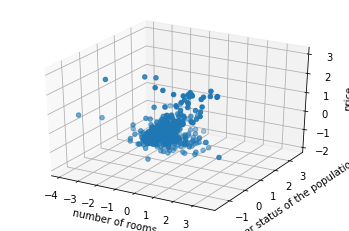

In [15]:
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = x.iloc[:, 0]
ys = x.iloc[:, 1]
zs = y
ax.scatter(xs, ys, zs)

ax.set_xlabel('number of rooms')
ax.set_ylabel('% lower status of the population')
ax.set_zlabel('price')

plt.show()

###### Gradient Descent Linear Regression

In [16]:
#Hyperparameters for Gradient Descent
a=0.001
max_iteration=1000


In [17]:
#initializing theta with some random values
theta = np.zeros((x.shape[1]+1, 1))

In [18]:
#Hypothesis function
def h (theta, X) :
    t = np.ones((X.shape[0], X.shape[1] + 1))
    t[:,1:] = X
    return np.matmul(t, theta)

In [19]:
#Loss fucntion
def loss (theta, X, Y) :
    return np.average(np.square(Y - h(theta, X))) / 2

In [20]:
def gradient (theta, X, Y) :
    t = np.ones((X.shape[0], X.shape[1] + 1))
    t[:,1:] = X
    d_theta = - np.average((Y - h(theta, X)) * t, axis= 0)
    d_theta = d_theta.reshape((d_theta.shape[0], 1))
    return d_theta

In [21]:
#Gradient Descent
def gradient_descent (theta, X, Y, learning_rate, max_iteration) :
    cost = np.zeros(max_iteration)
    for i in range(max_iteration) :
        d_theta = gradient (theta, X, Y)
        theta = theta - learning_rate * d_theta
        cost[i] = loss(theta, X, Y)
        if i % 10 == 0 :
            print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
    return theta, cost

In [22]:
#train the model
theta, cost = gradient_descent (theta, x, y, a, max_iteration)


iteration :  0  loss :  0.4989751846294511
iteration :  10  loss :  0.4889065899672649
iteration :  20  loss :  0.4791571999713998
iteration :  30  loss :  0.46971688976092413
iteration :  40  loss :  0.46057585564636283
iteration :  50  loss :  0.4517246049402413
iteration :  60  loss :  0.4431539460908829
iteration :  70  loss :  0.43485497912920207
iteration :  80  loss :  0.4268190864185657
iteration :  90  loss :  0.41903792369810666
iteration :  100  loss :  0.41150341141018115
iteration :  110  loss :  0.40420772630295476
iteration :  120  loss :  0.3971432932993894
iteration :  130  loss :  0.3903027776241799
iteration :  140  loss :  0.3836790771804562
iteration :  150  loss :  0.37726531516832873
iteration :  160  loss :  0.371054832937604
iteration :  170  loss :  0.3650411830672409
iteration :  180  loss :  0.3592181226643566
iteration :  190  loss :  0.35357960687581397
iteration :  200  loss :  0.3481197826056498
iteration :  210  loss :  0.3428329824318112
iteration :  2

In [23]:
print(theta)

[[ 1.30818895e-15]
 [ 3.38224414e-01]
 [-3.73299446e-01]]


In [24]:
#mean squared error
prediction=h(theta, x)
round(((prediction - y) ** 2).mean(),4)


0.3878

###### Scikit Learn

In [25]:
from sklearn.linear_model import LinearRegression


In [26]:
x.shape, y.shape

((506, 2), (506, 1))

In [27]:
lr = LinearRegression()

#Fitting the model
lr = lr.fit(x,y)

In [28]:
pred = lr.predict(x)

In [29]:
pred.shape

(506, 1)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y,pred)


0.3614383937396597